**課題:ゲーム販売店における需要予測**

これから取り組む課題は**ゲーム販売店における需要予測**です。 <br>**クライアントは需要を見誤ることで生じる在庫過多やその逆、欠品による損失を問題視しています。**

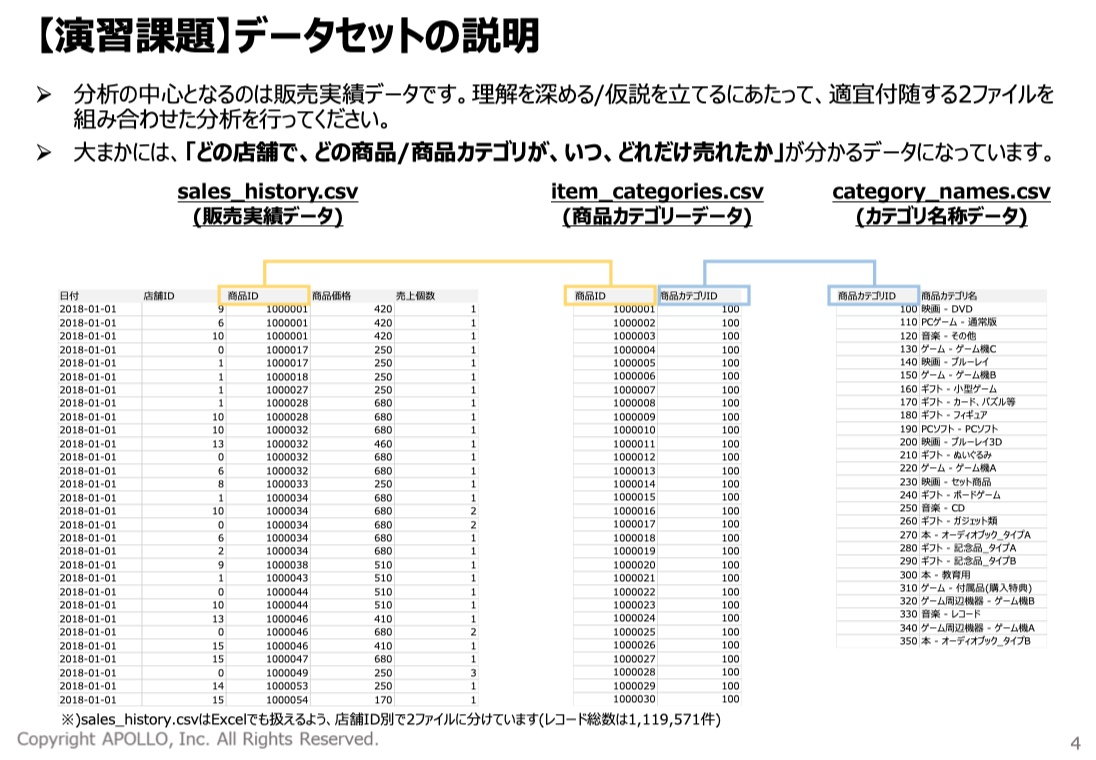

In [3]:
import pandas as pd

# ファイルの読み込み
sales_history1 = pd.read_excel('/content/sales_history1.xlsx')
sales_history2 = pd.read_excel('/content/sales_history2.xlsx')
item_categories = pd.read_excel('/content/item_categories.xlsx')
category_names = pd.read_excel('/content/category_names.xlsx')

# データの概要を表示
print("Sales History 1:")
print(sales_history1.info())
print(sales_history1.head())

print("\nSales History 2:")
print(sales_history2.info())
print(sales_history2.head())

print("\nItem Categories:")
print(item_categories.info())
print(item_categories.head())

print("\nCategory Names:")
print(category_names.info())
print(category_names.head())

# 販売実績データの結合
sales_data = pd.concat([sales_history1, sales_history2], ignore_index=True)

# 商品カテゴリとカテゴリ名を結合
item_category_data = pd.merge(item_categories, category_names, on='商品カテゴリID', how='left')

# 結合されたデータの概要を表示
print("\nCombined Sales Data:")
print(sales_data.info())
print(sales_data.head())

print("\nCombined Item-Category Data:")
print(item_category_data.info())
print(item_category_data.head())



Sales History 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611690 entries, 0 to 611689
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   日付      611690 non-null  datetime64[ns]
 1   店舗ID    611690 non-null  int64         
 2   商品ID    611690 non-null  int64         
 3   商品価格    611690 non-null  int64         
 4   売上個数    611690 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 23.3 MB
None
          日付  店舗ID     商品ID  商品価格  売上個数
0 2018-01-01     6  1000001   420     1
1 2018-01-01     0  1000017   250     1
2 2018-01-01     1  1000017   250     1
3 2018-01-01     1  1000018   250     1
4 2018-01-01     1  1000027   250     1

Sales History 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507880 entries, 0 to 507879
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   日付      507880 non-null  datetim

このコードは、以下の処理を行います：

各ファイルを読み込み、それぞれのデータセットの概要を確認。<br>
**販売実績データ（sales_history1 と sales_history2）を結合し、一つのデータセットに統合。**<br>
**商品カテゴリデータとカテゴリ名データを結合し、商品カテゴリ情報を統合。**<br>
このコードを実行して、データの結合および分析の準備を行います。続いて、具体的な分析を進めることができます。

In [4]:
# sales_data と item_category_data を商品IDで結合
merged_data = pd.merge(sales_data, item_category_data, on='商品ID', how='left')

# 結果のデータフレームを表示
merged_data.head()
merged_data

,日付,店舗ID,商品ID,商品価格,売上個数,商品カテゴリID,商品カテゴリ名
0,2018-01-01,6,1000001,420,1,100,映画 - DVD
1,2018-01-01,0,1000017,250,1,100,映画 - DVD
2,2018-01-01,1,1000017,250,1,100,映画 - DVD
3,2018-01-01,1,1000018,250,1,100,映画 - DVD
4,2018-01-01,1,1000027,250,1,100,映画 - DVD
...,...,...,...,...,...,...,...
1119565,2019-10-31,13,3200029,1360,1,320,ゲーム周辺機器 - ゲーム機B
1119566,2019-10-31,10,3300001,2040,1,330,音楽 - レコード
1119567,2019-10-31,15,3400002,1440,1,340,ゲーム周辺機器 - ゲーム機A
1119568,2019-10-31,17,3400003,1190,1,340,ゲーム周辺機器 - ゲーム機A


In [5]:
# merged_dataデータフレームをcsvファイルに変換して保存
output_file_path = '/content/merged_data.csv'
merged_data.to_csv(output_file_path, index=False)

# 保存したファイルパスを表示
print(f"データが {output_file_path} に保存されました。")

データが /content/merged_data.csv に保存されました。


**データ可視化のために、いくつかの基本的な可視化を行います。**<br>以下は、売上データを分析し、視覚的に理解するためのPythonコードです。

**このコードは、merged_dataデータフレームを使用して、商品カテゴリ別売上個数、店舗別売上個数、および日付ごとの売上個数の集計と可視化を行います。**<br>グラフは、フォント設定にIPAexGothicを使用しており、Seabornのスタイルを適用して見栄えの良いグラフを生成します。

<ipython-input-6-c7823c3519b0>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='売上個数', y='商品カテゴリ名', data=category_sales_summary, palette="viridis")


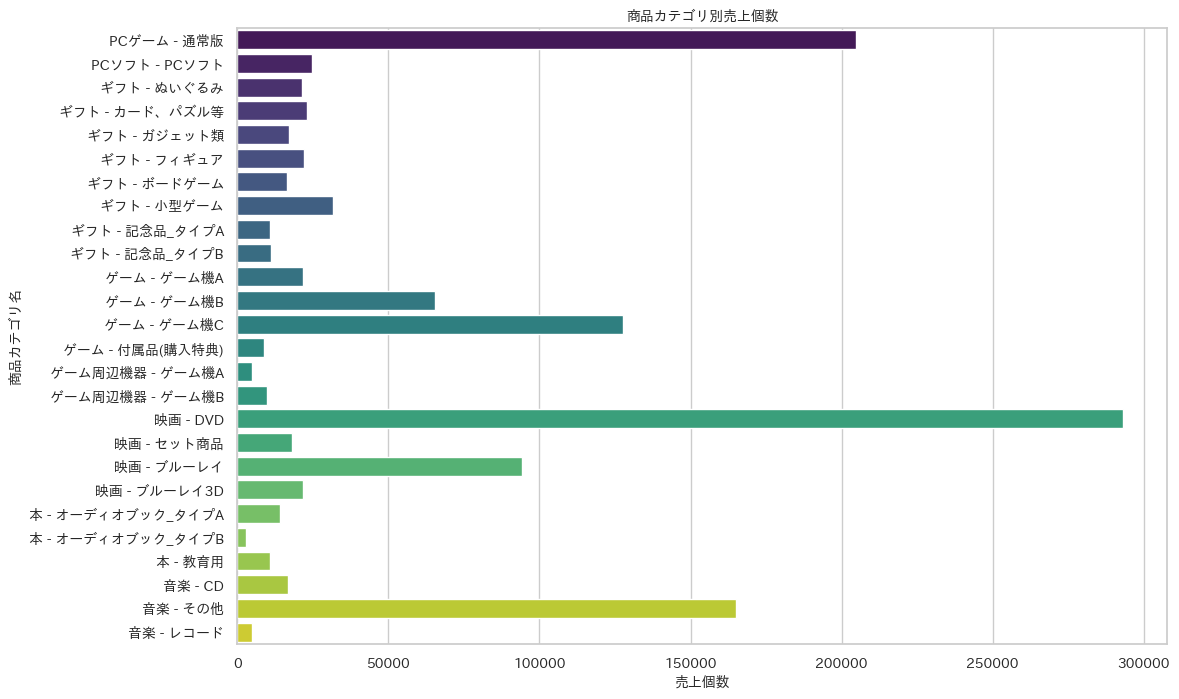

<ipython-input-6-c7823c3519b0>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='店舗ID', y='売上個数', data=store_sales_summary, palette="viridis")


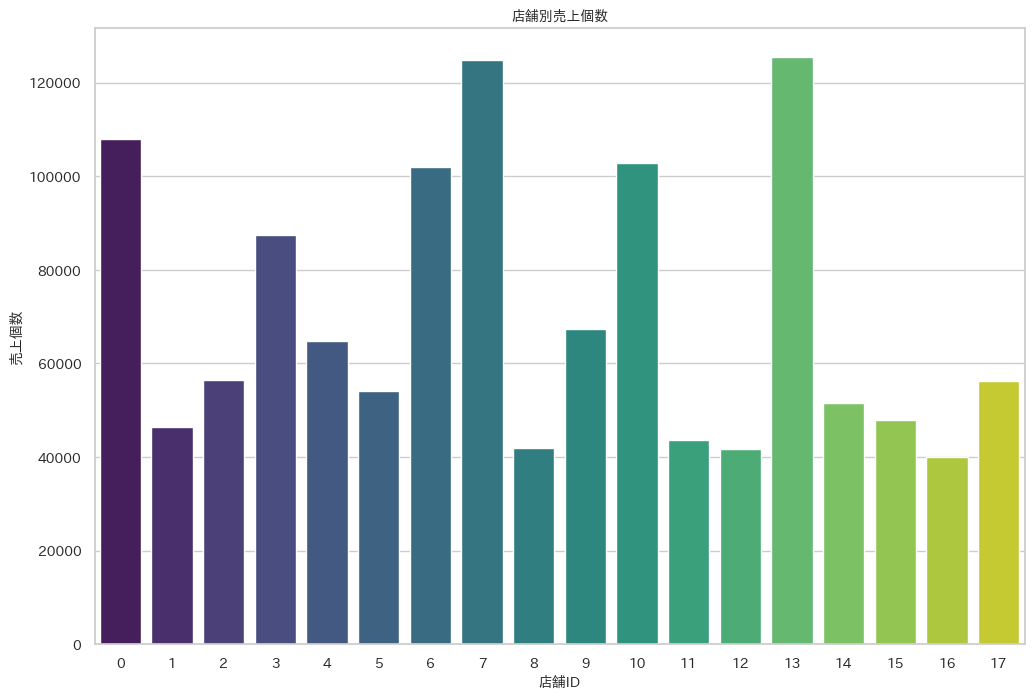

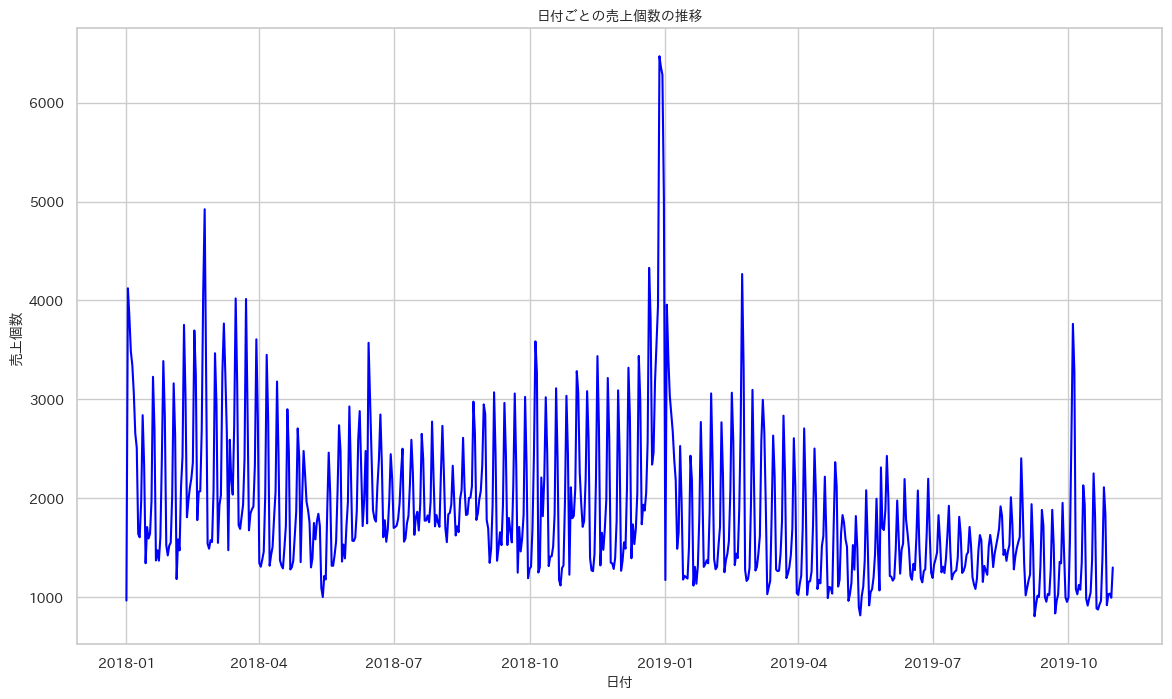

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# ------------- merged_dataを使って集計と可視化を実行 -------------

# 商品カテゴリ別売上個数の集計
category_sales_summary = merged_data.groupby('商品カテゴリ名')['売上個数'].sum().reset_index()

# IPAexGothicフォントの設定
font_path = '/content/ipaexg.ttf'  # IPAexGothicフォントのパスを指定
font_prop = font_manager.FontProperties(fname=font_path)

# matplotlibにフォントプロパティを適用
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け防止

# Seabornのスタイル設定
sns.set(style="whitegrid")

# 商品カテゴリ別売上個数の棒グラフ
plt.figure(figsize=(12, 8))
sns.barplot(x='売上個数', y='商品カテゴリ名', data=category_sales_summary, palette="viridis")
plt.title('商品カテゴリ別売上個数', fontproperties=font_prop)
plt.xlabel('売上個数', fontproperties=font_prop)
plt.ylabel('商品カテゴリ名', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()

# 店舗別売上個数の集計
store_sales_summary = merged_data.groupby('店舗ID')['売上個数'].sum().reset_index()

# 店舗別売上個数の棒グラフ
plt.figure(figsize=(12, 8))
sns.barplot(x='店舗ID', y='売上個数', data=store_sales_summary, palette="viridis")
plt.title('店舗別売上個数', fontproperties=font_prop)
plt.xlabel('店舗ID', fontproperties=font_prop)
plt.ylabel('売上個数', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()

# 日付ごとの売上個数の集計
daily_sales_summary = merged_data.groupby('日付')['売上個数'].sum().reset_index()

# 日付ごとの売上個数の折れ線グラフ
plt.figure(figsize=(14, 8))
plt.plot(daily_sales_summary['日付'], daily_sales_summary['売上個数'], color='blue')
plt.title('日付ごとの売上個数の推移', fontproperties=font_prop)
plt.xlabel('日付', fontproperties=font_prop)
plt.ylabel('売上個数', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.grid(True)
plt.show()


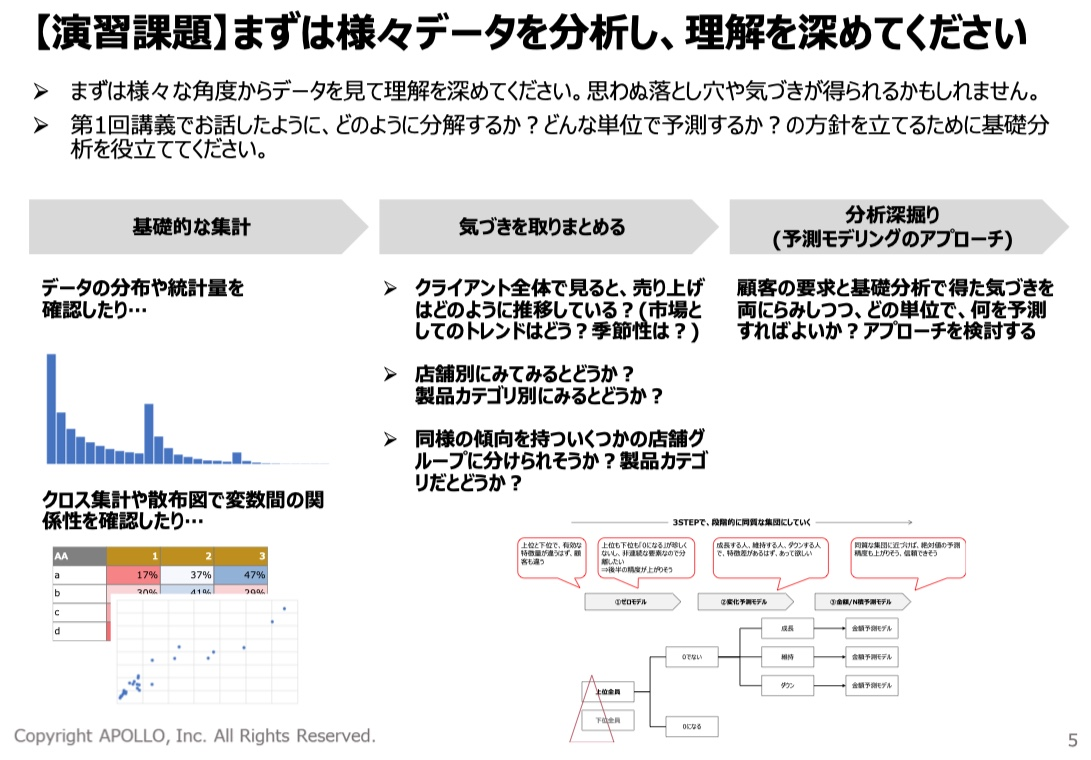

**1. 基本統計量の確認**<br>



データ全体の概要を理解するために、各列の基本統計量を確認します。

In [7]:
# 基本統計量の表示
print(merged_data.describe(include='all'))

# 欠損値の確認
print(merged_data.isnull().sum())


                                   日付          店舗ID          商品ID  \
count                         1119570  1.119570e+06  1.119570e+06   
unique                            NaN           NaN           NaN   
top                               NaN           NaN           NaN   
freq                              NaN           NaN           NaN   
mean    2018-11-04 02:41:39.346713344  7.975602e+00  1.458147e+06   
min               2018-01-01 00:00:00  0.000000e+00  1.000001e+06   
25%               2018-05-27 00:00:00  4.000000e+00  1.100021e+06   
50%               2018-11-02 00:00:00  7.000000e+00  1.201152e+06   
75%               2019-04-02 00:00:00  1.300000e+01  1.600003e+06   
max               2019-10-31 00:00:00  1.700000e+01  3.500073e+06   
std                               NaN  5.015283e+00  5.695805e+05   

                商品価格          売上個数      商品カテゴリID   商品カテゴリ名  
count   1.119570e+06  1.119570e+06  1.119570e+06   1119570  
unique           NaN           NaN           NaN 

**2. データの分布確認**<br>
商品カテゴリ別、店舗別、日付別など、重要な変数に対してデータの分布を確認します。

<ipython-input-37-09a8c66bda28>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='売上個数', y='商品カテゴリ名', data=category_sales_summary, palette="viridis")


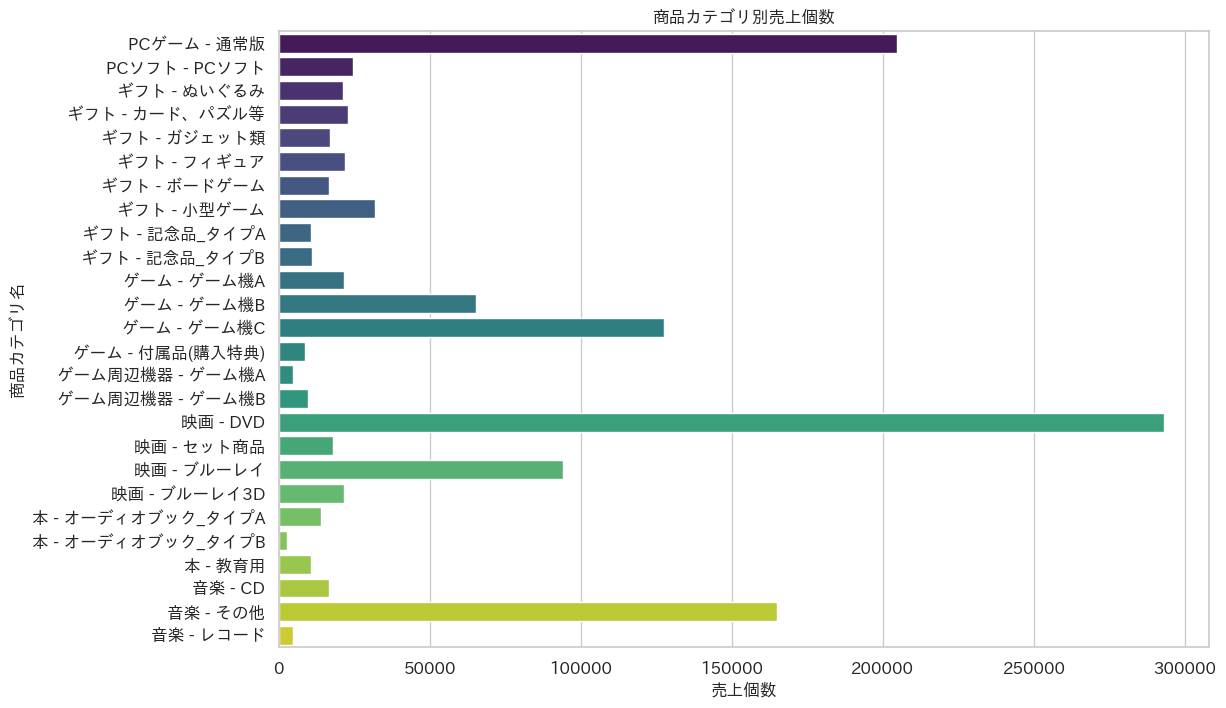

<ipython-input-37-09a8c66bda28>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='店舗ID', y='売上個数', data=store_sales_summary, palette="viridis")


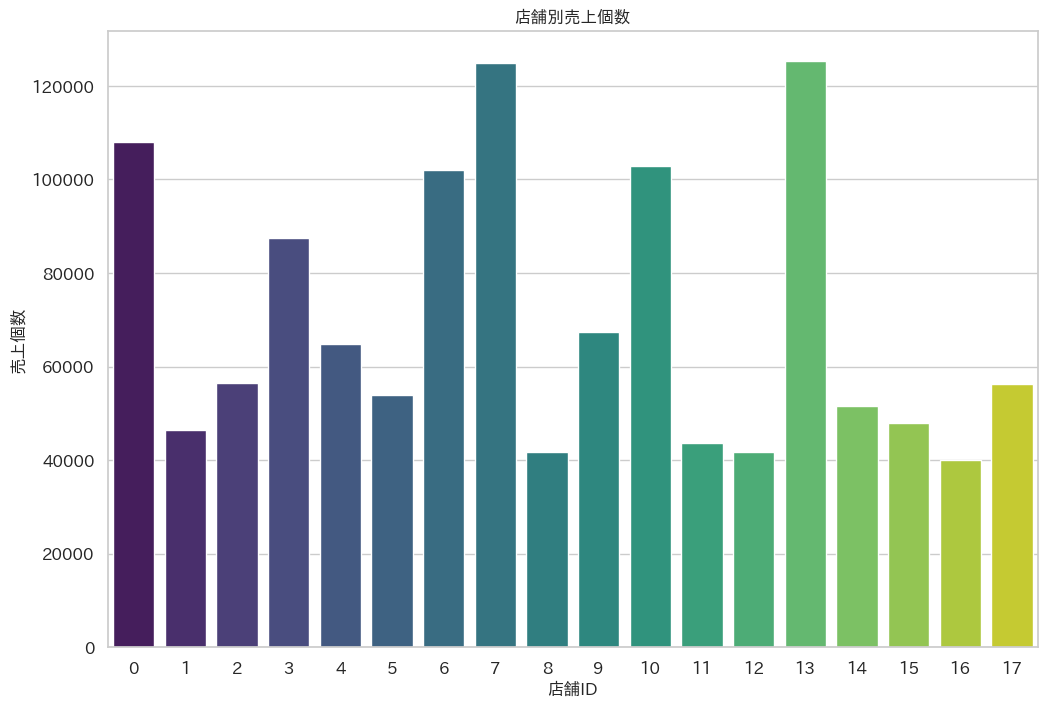

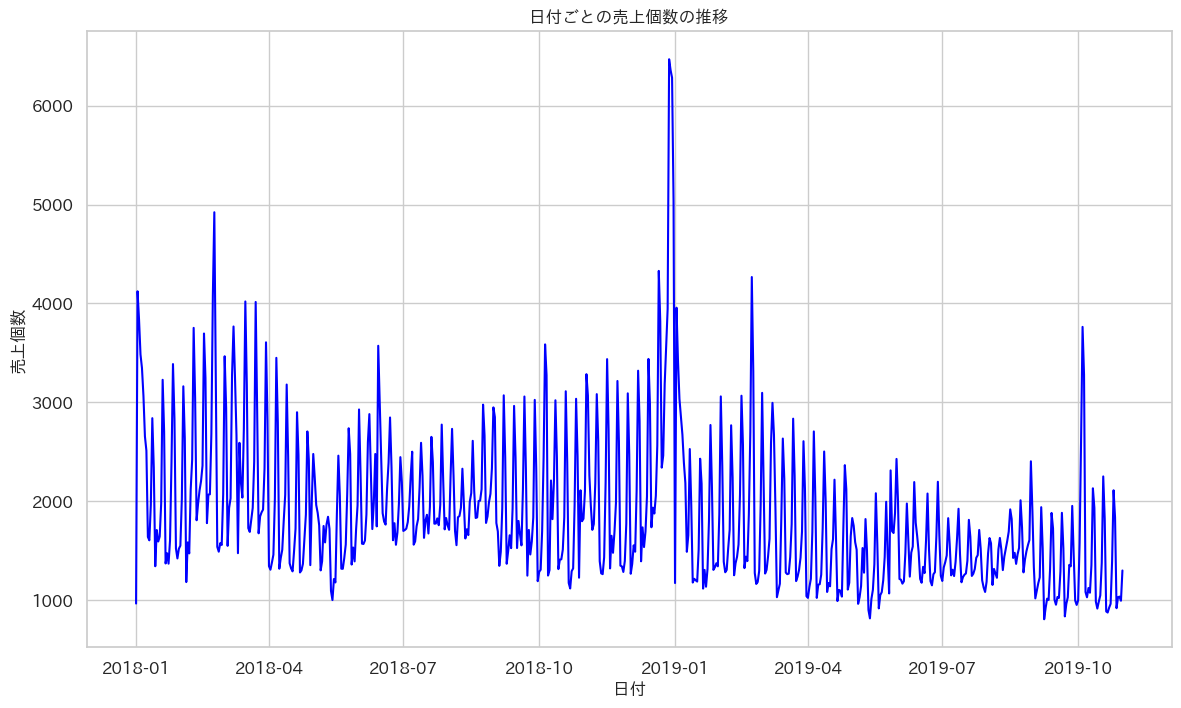

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# データの読み込み
sales_history1 = pd.read_excel('/content/sales_history1.xlsx')
sales_history2 = pd.read_excel('/content/sales_history2.xlsx')
item_categories = pd.read_excel('/content/item_categories.xlsx')
category_names = pd.read_excel('/content/category_names.xlsx')

# ------------------- データの結合 ------------------------------------

sales_data = pd.concat([sales_history1, sales_history2], ignore_index=True)
item_category_data = pd.merge(item_categories, category_names, on='商品カテゴリID', how='left')

#---------------------------------------------------------------------

# 商品カテゴリ別売上個数の集計
category_sales = sales_data.merge(item_category_data, on='商品ID', how='left')
category_sales_summary = category_sales.groupby('商品カテゴリ名')['売上個数'].sum().reset_index()

# IPAexGothicフォントの設定
font_path = '/content/ipaexg.ttf'  # IPAexGothicフォントのパスを指定
font_prop = font_manager.FontProperties(fname=font_path)

# matplotlibにフォントプロパティを適用
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け防止

# Seabornのスタイル設定
sns.set(style="whitegrid")

# 商品カテゴリ別売上個数の棒グラフ
plt.figure(figsize=(12, 8))
sns.barplot(x='売上個数', y='商品カテゴリ名', data=category_sales_summary, palette="viridis")
plt.title('商品カテゴリ別売上個数', fontproperties=font_prop)
plt.xlabel('売上個数', fontproperties=font_prop)
plt.ylabel('商品カテゴリ名', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()

# 店舗別売上個数の集計
store_sales_summary = sales_data.groupby('店舗ID')['売上個数'].sum().reset_index()

# 店舗別売上個数の棒グラフ
plt.figure(figsize=(12, 8))
sns.barplot(x='店舗ID', y='売上個数', data=store_sales_summary, palette="viridis")
plt.title('店舗別売上個数', fontproperties=font_prop)
plt.xlabel('店舗ID', fontproperties=font_prop)
plt.ylabel('売上個数', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()

# 日付ごとの売上個数の推移
daily_sales_summary = sales_data.groupby('日付')['売上個数'].sum().reset_index()

# 日付ごとの売上個数の折れ線グラフ
plt.figure(figsize=(14, 8))
plt.plot(daily_sales_summary['日付'], daily_sales_summary['売上個数'], color='blue')
plt.title('日付ごとの売上個数の推移', fontproperties=font_prop)
plt.xlabel('日付', fontproperties=font_prop)
plt.ylabel('売上個数', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.grid(True)
plt.show()

**3. クロス集計**<br>
変数間の関係性を確認するため、クロス集計を行います。

店舗ID                  0     1      2      3      4      5      6      7   \
商品カテゴリ名                                                                    
PCゲーム - 通常版        12245  9540   9340  11253  11875  12889  17752  18441   
PCソフト - PCソフト       1239   901    794   1852   2573   1128   3524   1496   
ギフト - ぬいぐるみ         1462   373   1580   1145   1193    882   1384   2060   
ギフト - カード、パズル等      2628   512    744   1323   1090    755   1714   3629   
ギフト - ガジェット類        1981   337    616    986    756    563   1470   2499   
ギフト - フィギュア         1894   588   1345   1207   1155    535   1880   2617   
ギフト - ボードゲーム        1477   574    663   1175    794    463    885   2061   
ギフト - 小型ゲーム         3199  1053    522   1762    976    658   2179   4125   
ギフト - 記念品_タイプA      1166   215    565    829    502    303    851   1565   
ギフト - 記念品_タイプB      1148   185    589    600    384    300    905   1393   
ゲーム - ゲーム機A         1716   964   1191   1260   1171   1122    961   1894   
ゲーム - ゲーム機B 

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12466 (\N{KATAKANA LETTER GE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 29256 (\N{CJK UNIFIED IDEOGRAPH-7248}) missing from current font.
  fig.canvas.draw()
/usr/loc

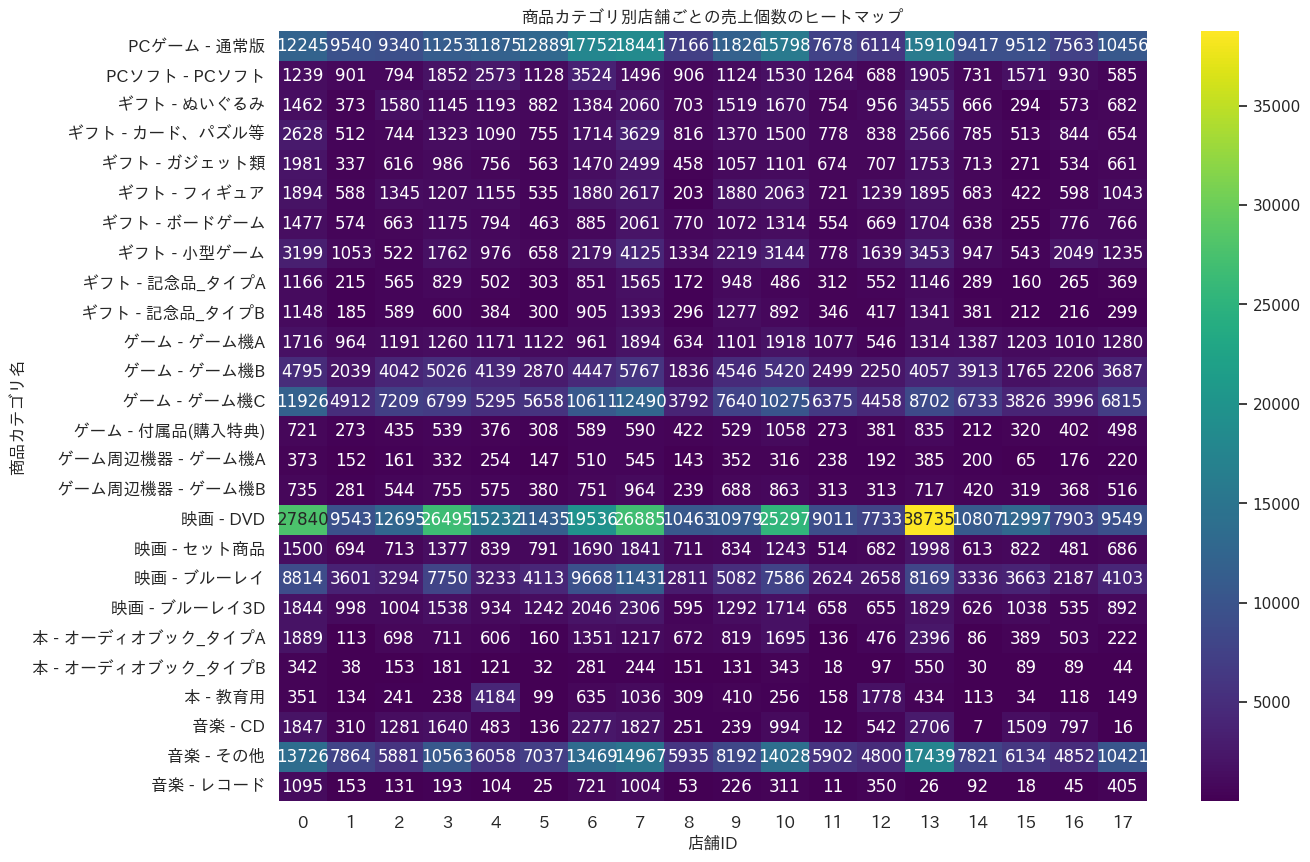

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager


# IPAexGothicフォントの設定
font_path = '/content/ipaexg.ttf'  # IPAexGothicフォントのパスを指定
font_prop = font_manager.FontProperties(fname=font_path)

# matplotlibにフォントプロパティを適用
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け防止

# Seabornのスタイル設定
sns.set(style="whitegrid")


# 商品カテゴリ別店舗ごとの売上個数のクロス集計
category_store_sales = pd.crosstab(merged_data['商品カテゴリ名'], merged_data['店舗ID'], values=merged_data['売上個数'], aggfunc='sum').fillna(0)
print(category_store_sales)

# 商品カテゴリ別店舗ごとの売上個数のヒートマップを作成
plt.figure(figsize=(14, 10))
sns.heatmap(category_store_sales, annot=True, fmt='.0f', cmap='viridis', cbar=True)
plt.title('商品カテゴリ別店舗ごとの売上個数のヒートマップ', fontproperties=font_prop)
plt.xlabel('店舗ID', fontproperties=font_prop)
plt.ylabel('商品カテゴリ名', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()


**4. 散布図による変数間の関係性の確認**<br>
売上個数とその他の変数（例えば価格や日付）との関係を散布図で確認します。

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33303 (\N{CJK UNIFIED IDEOGRAPH-8217}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


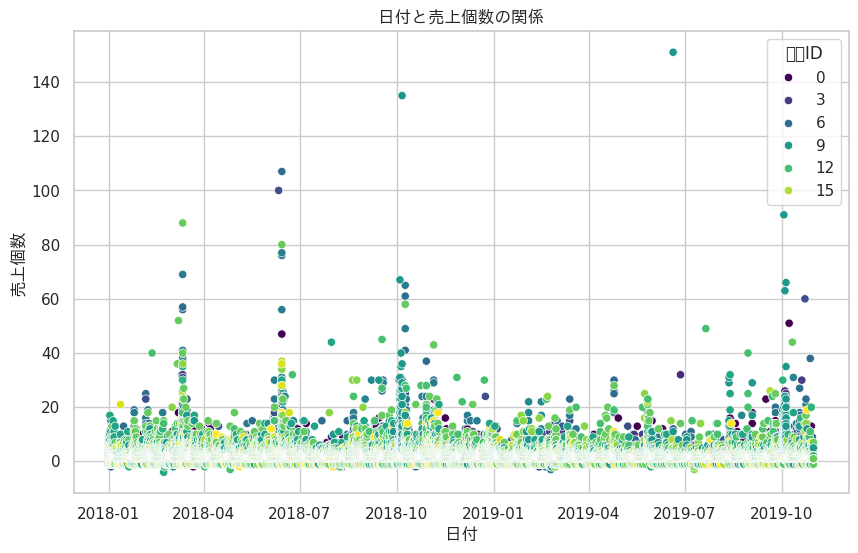

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# フォント設定
font_path = '/content/ipaexg.ttf'  # 適切なパスを指定
try:
    font_prop = font_manager.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = font_prop.get_name()
except Exception as e:
    print("IPAexGothicフォントが見つかりませんでした。デフォルトフォントを使用します。")
    plt.rcParams['font.family'] = 'Noto Sans CJK JP'

plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け防止

# 日付と売上個数の関係
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='日付', y='売上個数', hue='店舗ID', palette='viridis')
plt.title('日付と売上個数の関係', fontproperties=font_prop)
plt.xlabel('日付', fontproperties=font_prop)
plt.ylabel('売上個数', fontproperties=font_prop)
plt.show()


5. 相関分析
数値データ同士の相関関係を確認します。

**数値データのみを選択: 相関行列を作成する前に、merged_data から数値データだけを選択します。**

                店舗ID      商品ID      商品価格      売上個数  商品カテゴリID  商品カテゴリ名_数値
店舗ID        1.000000 -0.015592 -0.008760 -0.003232 -0.015586   -0.006192
商品ID       -0.015592  1.000000  0.222893 -0.028135  0.999999   -0.018949
商品価格       -0.008760  0.222893  1.000000  0.047378  0.223052   -0.186549
売上個数       -0.003232 -0.028135  0.047378  1.000000 -0.028146   -0.078232
商品カテゴリID   -0.015586  0.999999  0.223052 -0.028146  1.000000   -0.019316
商品カテゴリ名_数値 -0.006192 -0.018949 -0.186549 -0.078232 -0.019316    1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 33303 (\N{CJK UNIFIED IDEOGRAPH-8217}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.draw()
/usr

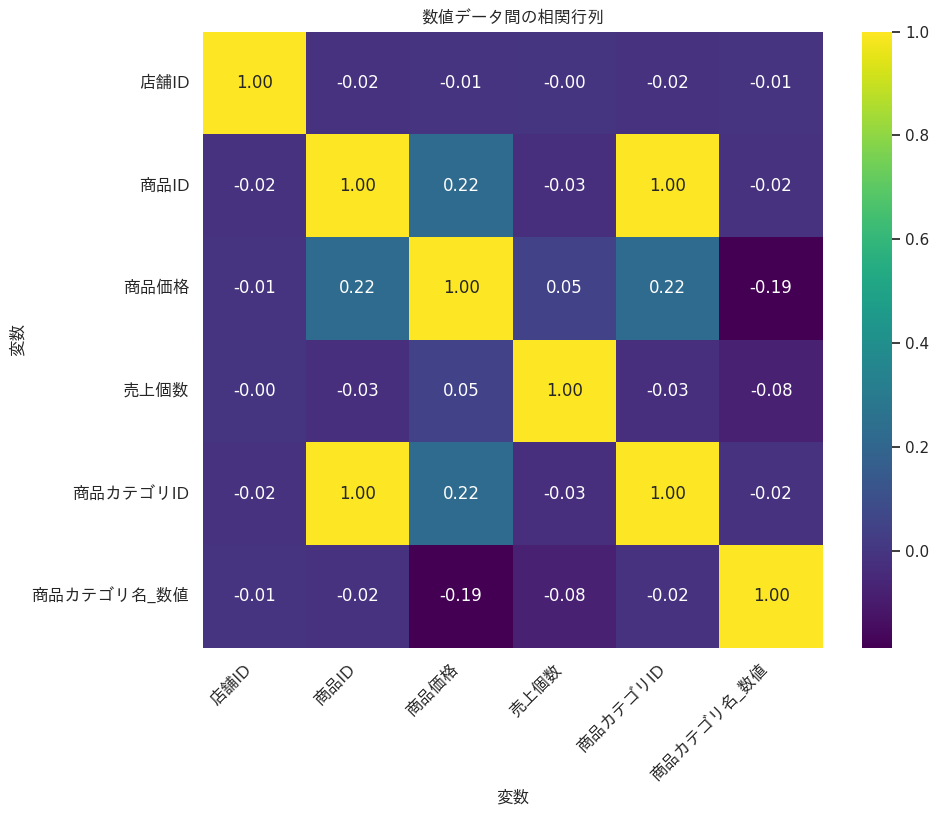

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# フォント設定
font_path = '/content/ipaexg.ttf'  # 適切なパスを指定
try:
    font_prop = font_manager.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = font_prop.get_name()
except Exception as e:
    print("IPAexGothicフォントが見つかりませんでした。デフォルトフォントを使用します。")
    plt.rcParams['font.family'] = 'Noto Sans CJK JP'

plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け防止

# 数値データのみを選択
numerical_data = merged_data.select_dtypes(include=['number'])

# 数値データの相関行列
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

# 相関行列のヒートマップ表示
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', cbar=True, fmt='.2f')
plt.title('数値データ間の相関行列', fontproperties=font_prop)
plt.xlabel('変数', fontproperties=font_prop)
plt.ylabel('変数', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop, rotation=45, ha='right')
plt.yticks(fontproperties=font_prop, rotation=0)
plt.show()


**カテゴリカルデータの数値化:** <br>もしカテゴリカルデータを含む列も相関に含めたい場合は、LabelEncoder や get_dummies() を使ってそれらを数値化します。

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 33303 (\N{CJK UNIFIED IDEOGRAPH-8217}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.draw()
/usr

                店舗ID      商品ID      商品価格      売上個数  商品カテゴリID  商品カテゴリ名_数値
店舗ID        1.000000 -0.015592 -0.008760 -0.003232 -0.015586   -0.006192
商品ID       -0.015592  1.000000  0.222893 -0.028135  0.999999   -0.018949
商品価格       -0.008760  0.222893  1.000000  0.047378  0.223052   -0.186549
売上個数       -0.003232 -0.028135  0.047378  1.000000 -0.028146   -0.078232
商品カテゴリID   -0.015586  0.999999  0.223052 -0.028146  1.000000   -0.019316
商品カテゴリ名_数値 -0.006192 -0.018949 -0.186549 -0.078232 -0.019316    1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.draw()


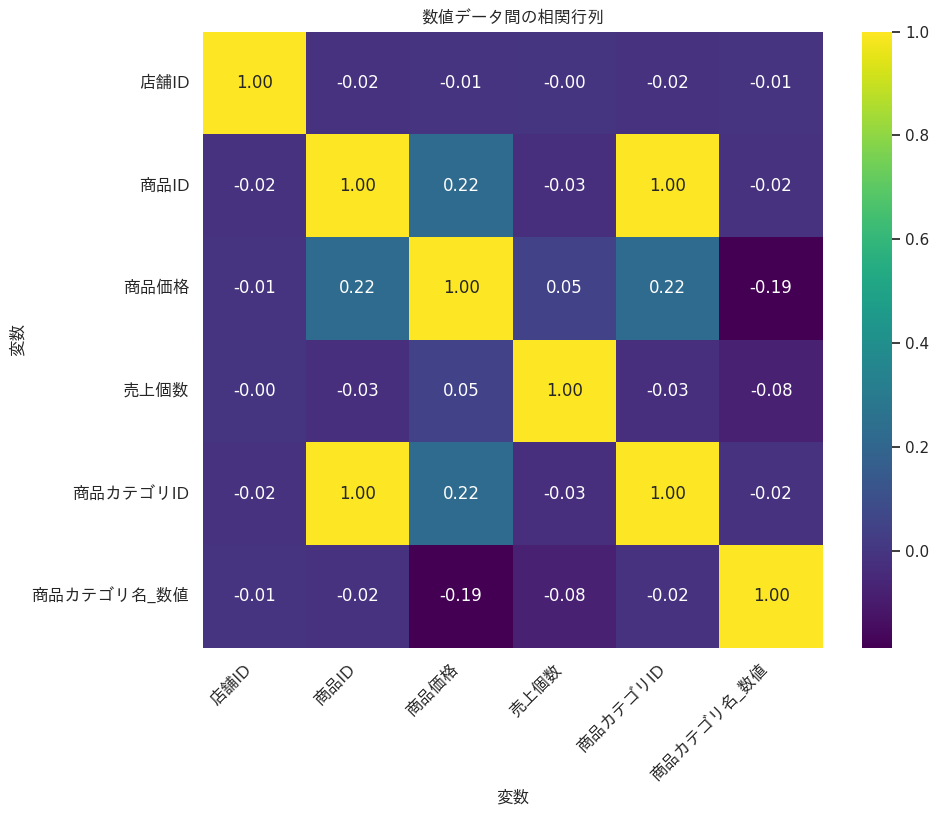

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# フォント設定
font_path = '/content/ipaexg.ttf'  # 適切なパスを指定
try:
    font_prop = font_manager.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = font_prop.get_name()
except Exception as e:
    print("IPAexGothicフォントが見つかりませんでした。デフォルトフォントを使用します。")
    plt.rcParams['font.family'] = 'Noto Sans CJK JP'

plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け防止

from sklearn.preprocessing import LabelEncoder

# 商品カテゴリ名を数値化
label_encoder = LabelEncoder()
merged_data['商品カテゴリ名_数値'] = label_encoder.fit_transform(merged_data['商品カテゴリ名'])

# 数値データを再選択
numerical_data = merged_data.select_dtypes(include=['number'])

# 数値データの相関行列
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

# 相関行列のヒートマップ表示
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', cbar=True)
plt.title('数値データ間の相関行列', fontproperties=font_prop)
plt.xlabel('変数', fontproperties=font_prop)
plt.ylabel('変数', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop, rotation=45, ha='right')
plt.yticks(fontproperties=font_prop, rotation=0)
plt.show()


ワーク : 改めて、**静岡県の欠損週の予測を**してみましょう

**ワーク1 移動平均や散布図を改めて再現**してみる ここまでの内容を見て、改めて移動平均や散布図(期ずれ含む)を作ってみてください。実際に移動平均の期間を 長くするほどグラフがなだらかになっていることなど、データの特徴を感じ取ってみてください。

['2018-01-01' '2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05'
 '2018-01-06' '2018-01-07' '2018-01-08' '2018-01-09' '2018-01-10'
 '2018-01-11' '2018-01-12' '2018-01-13' '2018-01-14' '2018-01-15'
 '2018-01-16' '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20'
 '2018-01-21' '2018-01-22' '2018-01-23' '2018-01-24' '2018-01-25'
 '2018-01-26' '2018-01-27' '2018-01-28' '2018-01-29' '2018-01-30'
 '2018-01-31' '2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04'
 '2018-02-05' '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09'
 '2018-02-10' '2018-02-11' '2018-02-12' '2018-02-13' '2018-02-14'
 '2018-02-15' '2018-02-16' '2018-02-17' '2018-02-18' '2018-02-19'
 '2018-02-20' '2018-02-21' '2018-02-22' '2018-02-23' '2018-02-24'
 '2018-02-25' '2018-02-26' '2018-02-27' '2018-02-28' '2018-03-01'
 '2018-03-02' '2018-03-03' '2018-03-04' '2018-03-05' '2018-03-06'
 '2018-03-07' '2018-03-08' '2018-03-09' '2018-03-10' '2018-03-11'
 '2018-03-12' '2018-03-13' '2018-03-14' '2018-03-15' '2018-03-16'
 '2018-03-

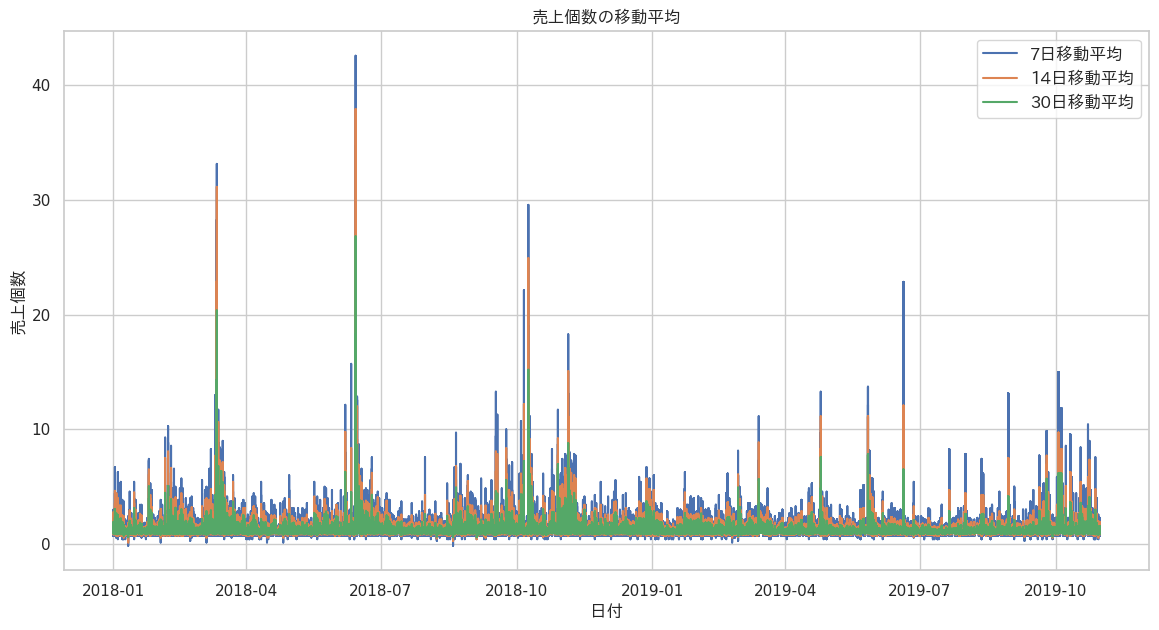

Index(['日付', '店舗ID', '商品ID', '商品価格', '売上個数', '商品カテゴリID', '商品カテゴリ名',
       '売上個数_7日移動平均', '売上個数_14日移動平均', '売上個数_30日移動平均'],
      dtype='object')
価格に対応する列が見つかりませんでした。


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# フォント設定
font_path = '/content/ipaexg.ttf'  # アップロードされたフォントファイルのパスを指定
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け防止

# データの読み込み
merged_data = pd.read_csv('/content/merged_data.csv', low_memory=False)

# '日付' 列に含まれるユニークな値を確認
print(merged_data['日付'].unique())

# '0' を NA に置き換え
merged_data['日付'] = merged_data['日付'].replace('0', pd.NA)

# '日付' 列をdatetime型に変換し、エラーが出た場合は無視（coerce）
merged_data['日付'] = pd.to_datetime(merged_data['日付'], errors='coerce')

# 移動平均の計算（7日間、14日間、30日間）
merged_data['売上個数_7日移動平均'] = merged_data['売上個数'].rolling(window=7).mean()
merged_data['売上個数_14日移動平均'] = merged_data['売上個数'].rolling(window=14).mean()
merged_data['売上個数_30日移動平均'] = merged_data['売上個数'].rolling(window=30).mean()

# 移動平均のプロット
plt.figure(figsize=(14, 7))
plt.plot(merged_data['日付'], merged_data['売上個数_7日移動平均'], label='7日移動平均')
plt.plot(merged_data['日付'], merged_data['売上個数_14日移動平均'], label='14日移動平均')
plt.plot(merged_data['日付'], merged_data['売上個数_30日移動平均'], label='30日移動平均')
plt.title('売上個数の移動平均', fontproperties=font_prop)
plt.xlabel('日付', fontproperties=font_prop)
plt.ylabel('売上個数', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.grid(True)
plt.show()

# 散布図の作成
# '価格' 列が存在する場合の例を考えて、列名を確認します
print(merged_data.columns)

# 価格列が存在するかを確認し、散布図を作成します
if '価格' in merged_data.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_data['価格'], merged_data['売上個数'], alpha=0.5)
    plt.title('価格と売上個数の散布図', fontproperties=font_prop)
    plt.xlabel('価格', fontproperties=font_prop)
    plt.ylabel('売上個数', fontproperties=font_prop)
    plt.grid(True)
    plt.show()
else:
    print("価格に対応する列が見つかりませんでした。")

# 全コード終了



**ワーク2 中心化移動平均について調べて、実際にやってみる** <br>今日の内容を受けて、移動平均を偶数で取ろうとするとどんな不都合があるか、ご自身の言葉で説明してみてくだ **さい。また、それに対応するためにある「中心化移動平均」について調べ、実際にやってみてください。**

中心化移動平均 (Centered Moving Average) について
1. 偶数期間の移動平均を取る際の不都合
遅れの問題: 移動平均は、選択された期間の過去の値を平均することで計算されます。そのため、特に偶数期間を設定した場合、移動平均の結果がデータの最後の時点に対応しないことが多いです。例えば、4日間の移動平均を計算すると、3日目と4日目の間の値を計算することになります。これにより、データの変化が「遅れて」反映されるため、トレンドを正確に把握するのが難しくなります。
2. 中心化移動平均 (Centered Moving Average) の概要
中心化移動平均は、この遅れの問題を解決するための方法です。偶数期間の移動平均を使用する場合、データの中央に対応する値を計算するために、過去のデータと未来のデータの平均を取ります。これにより、移動平均がデータの中央に対応し、トレンドがより正確に反映されるようになります。


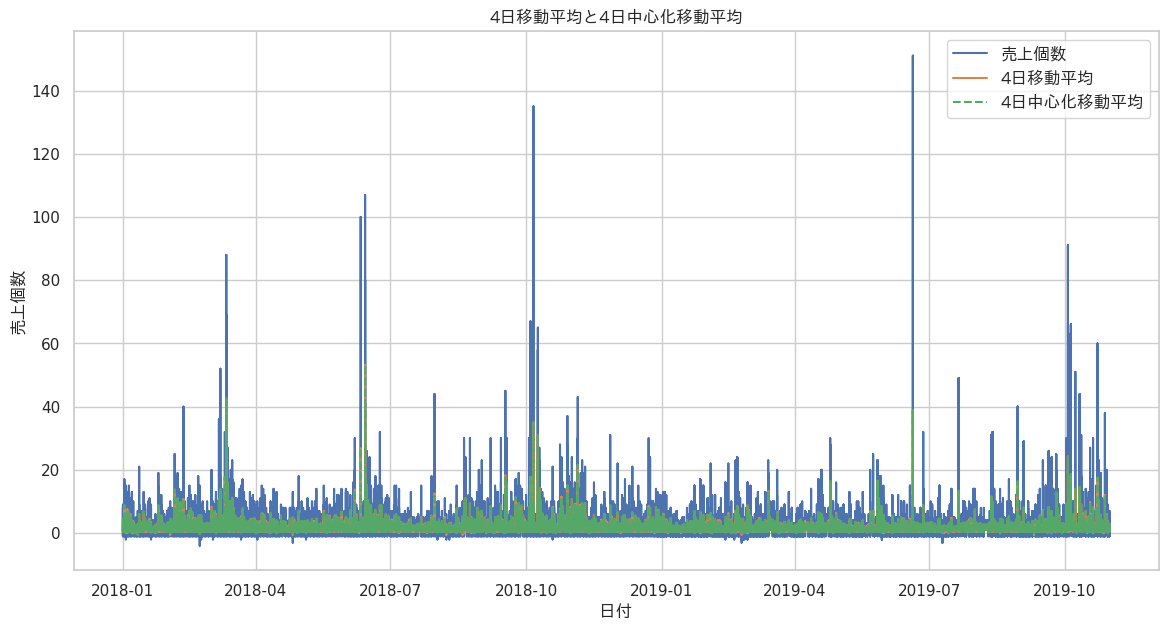

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# フォント設定
font_path = '/content/ipaexg.ttf'  # 適切なフォントファイルのパス
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け防止

# データの読み込み
merged_data = pd.read_csv('/content/merged_data.csv', low_memory=False)
merged_data['日付'] = pd.to_datetime(merged_data['日付'], errors='coerce')

# 偶数期間の移動平均（例えば4日間）の計算
merged_data['4日移動平均'] = merged_data['売上個数'].rolling(window=4).mean()

# 中心化移動平均の計算
merged_data['4日中心化移動平均'] = merged_data['4日移動平均'].shift(-1)

# 移動平均と中心化移動平均のプロット
plt.figure(figsize=(14, 7))
plt.plot(merged_data['日付'], merged_data['売上個数'], label='売上個数')
plt.plot(merged_data['日付'], merged_data['4日移動平均'], label='4日移動平均')
plt.plot(merged_data['日付'], merged_data['4日中心化移動平均'], label='4日中心化移動平均', linestyle='--')
plt.title('4日移動平均と4日中心化移動平均', fontproperties=font_prop)
plt.xlabel('日付', fontproperties=font_prop)
plt.ylabel('売上個数', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.grid(True)
plt.show()


実装の解説
4日移動平均: rolling(window=4).mean() を使用して、4日間の移動平均を計算します。この場合、データの過去4日分の平均が計算されますが、最後のデータ点に遅れが発生します。
4日中心化移動平均: shift(-1) を使って、移動平均を1日先にずらします。これにより、計算された移動平均がデータの中央に対応するようになります。


まとめ
中心化移動平均は、特に偶数期間の移動平均を使用する際に、トレンドの遅れを解消し、データの中央に対応する値を得るための有効な手法です。この手法を使うことで、データの変化をより正確に反映させることができます。

**ワーク3 季節性の除去と移動平均について** <br>今回のワークでは１年間＝52週に対し、52週移動平均を取ることで季節性を除去しました。<br>同様に１年間が 12か月で表現されたデータであれば12か月移動平均を、四半期なら四半期移動平均を取ることで季節性を除 去できます。<br>なぜ除去できるか？考えてみてください(四則演算で理解できます)。

季節性の除去についての考察
季節性の除去とは、データに存在する周期的なパターン（季節性）を取り除くことです。例えば、年間を通じて発生する季節性の影響を除去するためには、52週移動平均や12か月移動平均を使用します。

理論的背景
移動平均を使用して季節性を除去する理由は、移動平均がデータの短期的な変動を滑らかにし、長期的なトレンドや周期的なパターン（季節性）を取り除くためです。

具体的には、1年間のデータに対して52週移動平均を取ると、1年間にわたる全ての季節性パターンが平均化され、結果として季節性の影響が軽減されます。同様に、12か月移動平均を取ると、12か月間の季節性が平均化されるため、季節性のパターンがデータから除去されます。

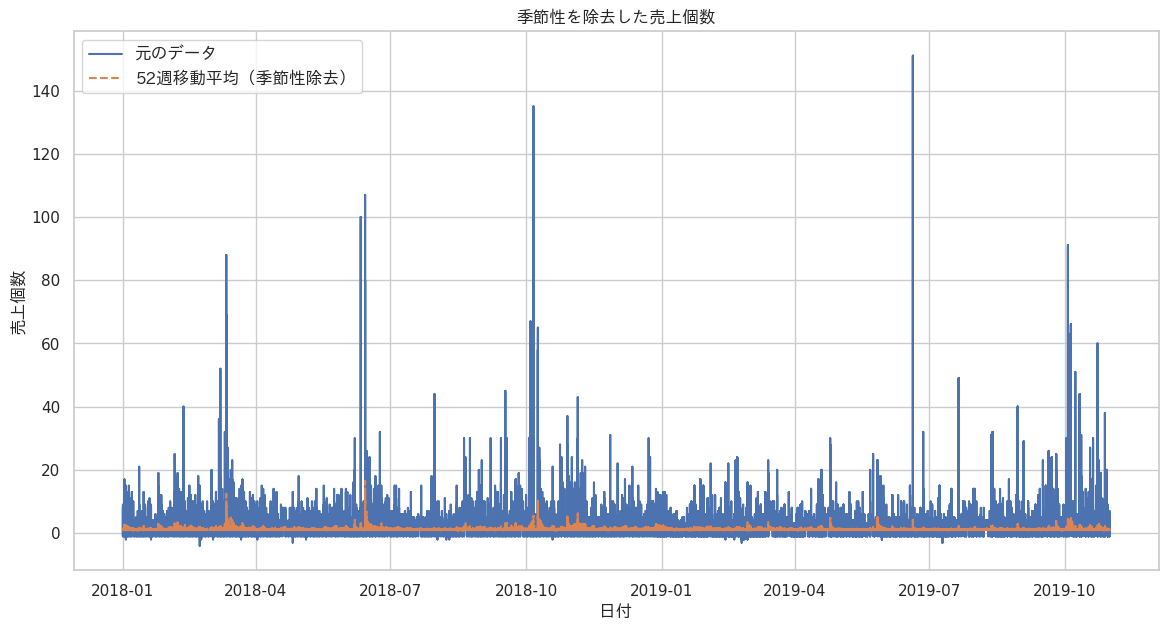

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# フォント設定
font_path = '/content/ipaexg.ttf'  # 適切なフォントファイルのパスを指定
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け防止

# データの読み込み
merged_data = pd.read_csv('/content/merged_data.csv', low_memory=False)
merged_data['日付'] = pd.to_datetime(merged_data['日付'], errors='coerce')

# 52週移動平均の計算（季節性の除去）
merged_data['52週移動平均'] = merged_data['売上個数'].rolling(window=52).mean()

# 季節性を除去したデータのプロット
plt.figure(figsize=(14, 7))
plt.plot(merged_data['日付'], merged_data['売上個数'], label='元のデータ')
plt.plot(merged_data['日付'], merged_data['52週移動平均'], label='52週移動平均（季節性除去）', linestyle='--')
plt.title('季節性を除去した売上個数', fontproperties=font_prop)
plt.xlabel('日付', fontproperties=font_prop)
plt.ylabel('売上個数', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.grid(True)
plt.show()


説明
52週移動平均の計算:

rolling(window=52).mean()を使用して、52週移動平均を計算します。これにより、1年間の季節性が平均化され、長期的なトレンドが浮かび上がります。
プロット:

元のデータと52週移動平均をプロットして、季節性の除去がどのようにデータに影響を与えるかを視覚的に確認します。

なぜ季節性を除去できるのか？
四則演算で考えると、季節性はデータの特定の周期において繰り返されるパターンです。移動平均は、指定された期間内のデータの平均を計算するため、この周期的なパターンが平均化されます。これにより、データから周期的な変動（季節性）が取り除かれ、より滑らかでトレンドに基づいたデータが得られます。


**ワーク4 静岡県欠損週の予測** <br>改めて、これまでのアイデアも使って合理的に予測するアプローチを検討・実践してみてください。

静岡県の欠損週を予測するためには、これまで学んだ移動平均や中心化移動平均、季節性の除去などの手法を活用することが考えられます。ここでは、以下のステップで欠損週の予測を行います。

ステップ1: データの準備
まず、欠損週を特定し、その周辺のデータを使用して欠損値を埋めるためのモデルを構築します。

ステップ2: 移動平均や季節性を考慮したデータ補完
移動平均や中心化移動平均を使用して、欠損週の売上個数を合理的に予測します。

ステップ3: 補完結果の評価
補完されたデータがどれだけ元のデータに近いかを評価します。

欠損値の数: 1


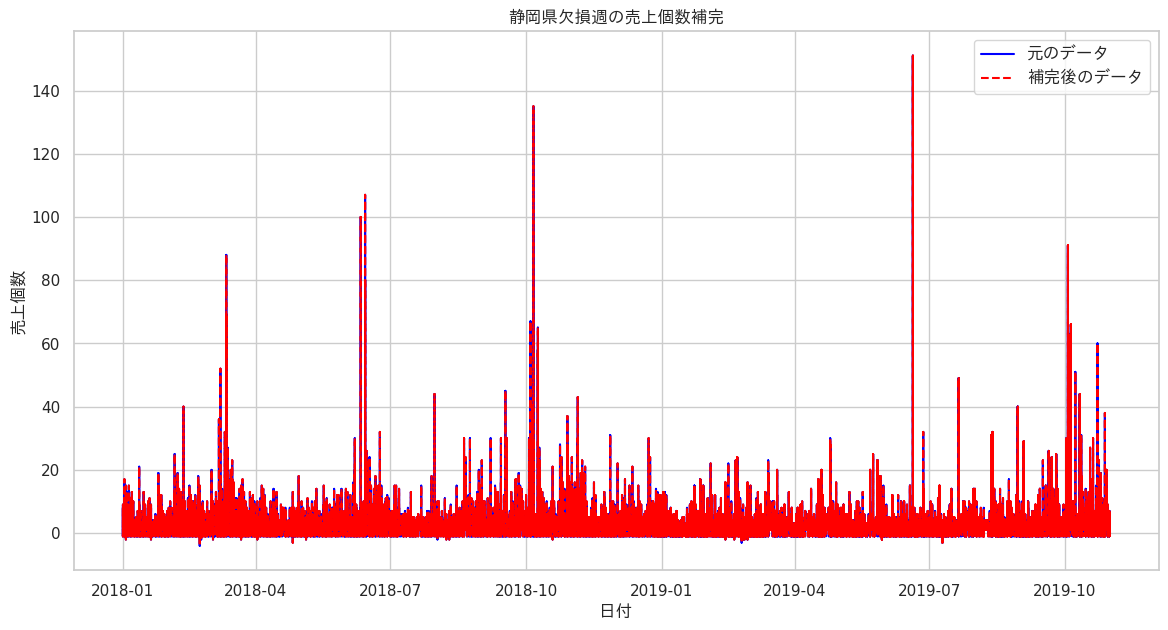

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np

# フォント設定
font_path = '/content/ipaexg.ttf'  # 適切なフォントファイルのパスを指定
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け防止

# データの読み込み
merged_data = pd.read_csv('/content/merged_data.csv', low_memory=False)
merged_data['日付'] = pd.to_datetime(merged_data['日付'], errors='coerce')

# 欠損値の確認
print("欠損値の数:", merged_data['売上個数'].isna().sum())

# 移動平均（例えば52週移動平均）を使用して欠損値を補完
merged_data['売上個数_52週移動平均'] = merged_data['売上個数'].rolling(window=52, min_periods=1).mean()

# 欠損値を52週移動平均で補完
merged_data['売上個数_補完'] = merged_data['売上個数'].fillna(merged_data['売上個数_52週移動平均'])

# 補完前後のデータをプロットして確認
plt.figure(figsize=(14, 7))
plt.plot(merged_data['日付'], merged_data['売上個数'], label='元のデータ', color='blue')
plt.plot(merged_data['日付'], merged_data['売上個数_補完'], label='補完後のデータ', linestyle='--', color='red')
plt.title('静岡県欠損週の売上個数補完', fontproperties=font_prop)
plt.xlabel('日付', fontproperties=font_prop)
plt.ylabel('売上個数', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.grid(True)
plt.show()

# 補完後のデータを保存（必要に応じて）
merged_data.to_csv('/content/completed_sales_data.csv', index=False)


ステップ1: データの準備
merged_data['日付'] = pd.to_datetime(merged_data['日付'], errors='coerce') を使用して、日付を datetime 型に変換します。
merged_data['売上個数'].isna().sum() で欠損値の数を確認します。
ステップ2: 移動平均や季節性を考慮したデータ補完
rolling(window=52, min_periods=1).mean() を使用して、52週移動平均を計算します。この平均値を使用して欠損値を補完します。
fillna() 関数を使用して、欠損値を補完された移動平均で埋めます。
ステップ3: 補完結果の評価
プロットで補完前後のデータを視覚的に確認します。青線が元のデータ、赤線が補完後のデータです。

補完後のデータの保存
必要に応じて、補完後のデータをCSVファイルに保存します。
この手法により、欠損週のデータを合理的に補完できます。補完結果が適切かどうかを確認するために、データの傾向や季節性を考慮した評価を行ってください。さらに精度を高めるためには、他の補完手法やモデルを試すことも検討してください。

**--------静岡県の2021年を予測する--------**